In [1]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# trainval and test dataset
trainval_df = pd.read_pickle('../data/train_val.pkl')
test_df = pd.read_pickle("../data/test.pkl")
print("[INFO]:Load data from datasets...")
df = np.concatenate([test_df.iloc[:, 3:].values, trainval_df.iloc[:, 3:].values], axis=0) 
print("[INFO]:Total data num: {}".format(df.shape[0]))
# without adc version and tot, tob
cluster_df = df[:, 1:-2]
assert cluster_df.shape[-1] == 27 + 12

# # KPrototypes需要我们指定离散特征的列索引
categorical_columns = np.arange(12).tolist()

[INFO]:Load data from datasets...
[INFO]:Total data num: 17294


In [ ]:
# num cluster
num_cluster = 3
# 初始化KPrototypes对象
kproto = KPrototypes(n_clusters=num_cluster, max_iter=100, init='Cao', verbose=2, n_init=4, n_jobs=1)
# # 执行聚类
clusters = kproto.fit_predict(cluster_df, categorical=categorical_columns)

In [4]:
df_clustered = np.concatenate([df, clusters.reshape(-1,1)], axis=-1)
tot_original = df_clustered[:, -3]
tob_original = df_clustered[:, -2]
cluster = df_clustered[:, -1]
tot_clusters = []
tob_clusters = []
for i in range(num_cluster):
    tot_clusters.append(df_clustered[df_clustered[:, -1]==i][:, -3])
    tob_clusters.append(df_clustered[df_clustered[:, -1]==i][:, -2])

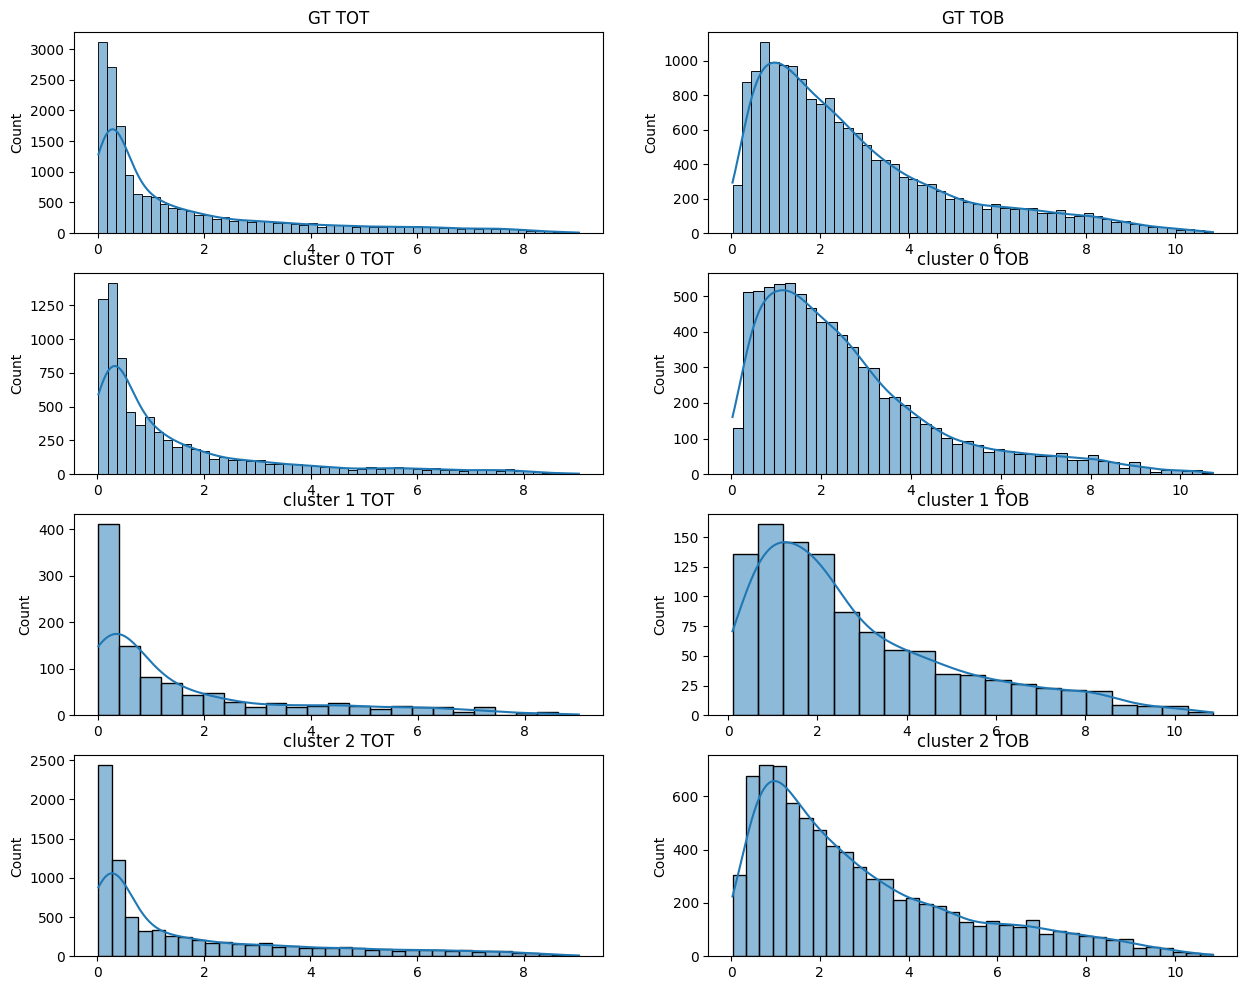

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(num_cluster+1, 2, figsize=(15, 4*num_cluster))
sns.histplot(tot_original, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('GT TOT')
sns.histplot(tob_original, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('GT TOB')
for i in range(num_cluster):
  sns.histplot(tot_clusters[i], kde=True, ax=axes[i+1, 0])
  axes[i+1, 0].set_title(f'cluster {i} TOT')
  sns.histplot(tob_clusters[i], kde=True, ax=axes[i+1, 1])
  axes[i+1, 1].set_title(f'cluster {i} TOB')

Text(0.5, 1.0, 'trans TOB')

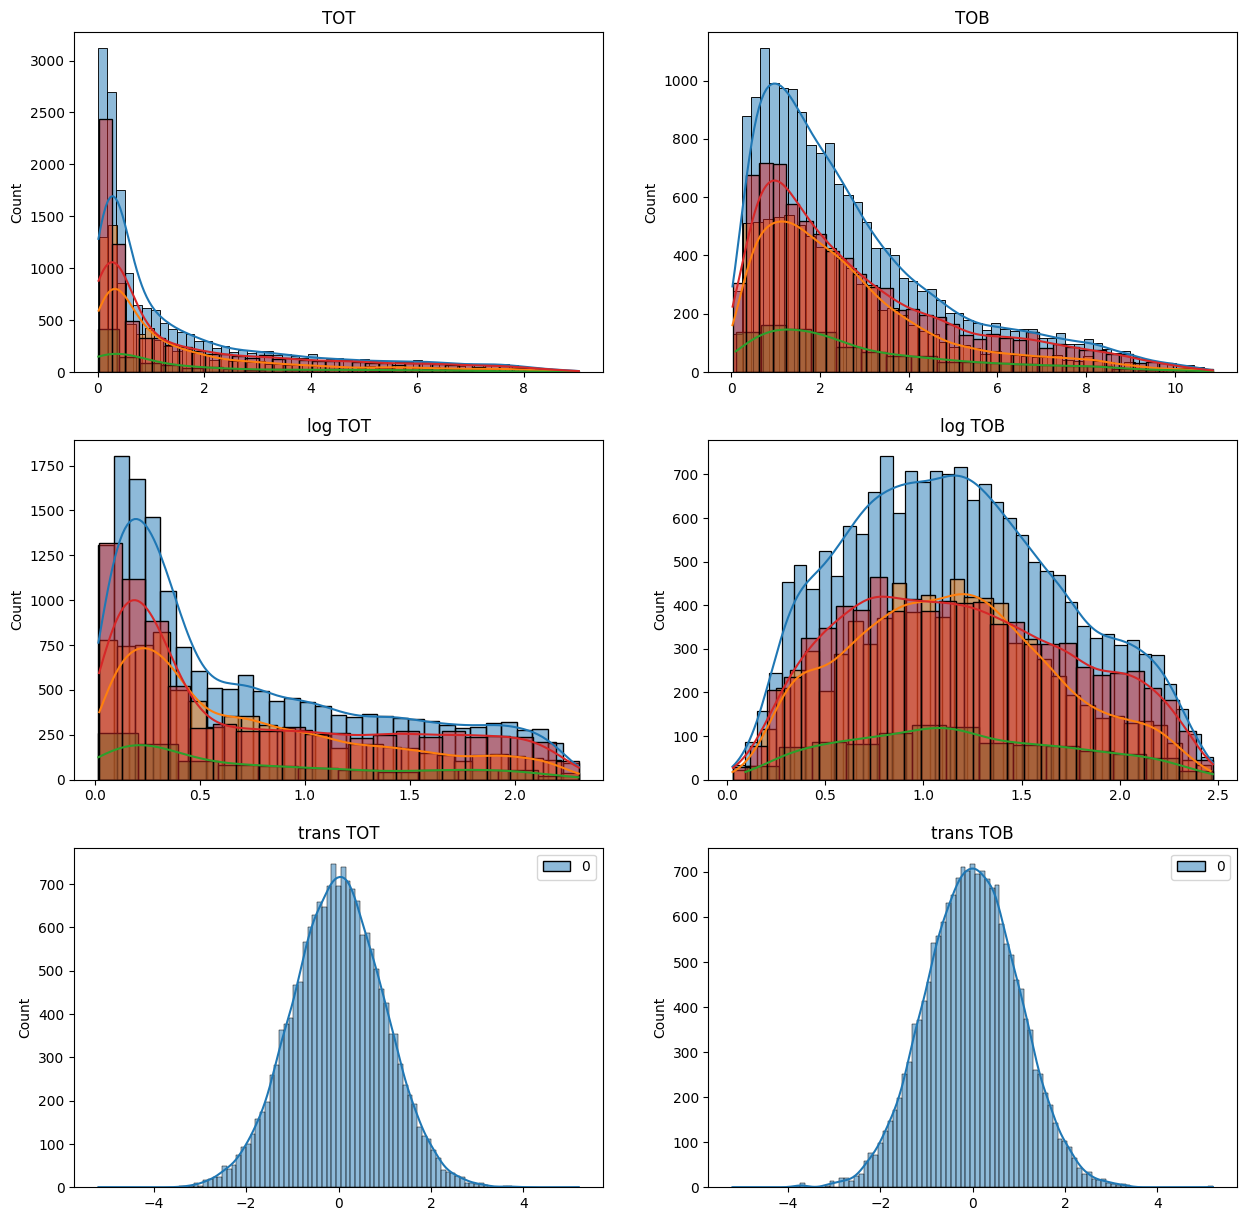

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(tot_original, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('TOT')
sns.histplot(tob_original, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('TOB')
for i in range(num_cluster):
  sns.histplot(tot_clusters[i], kde=True, ax=axes[0, 0])
  sns.histplot(tob_clusters[i], kde=True, ax=axes[0, 1])
# log
sns.histplot(np.log(np.array(tot_original, dtype='float')+1), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('log TOT')
sns.histplot(np.log(np.array(tob_original, dtype='float')+1), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('log TOB')
for i in range(num_cluster):
  sns.histplot(np.log(np.array(tot_clusters[i], dtype='float')+1), kde=True, ax=axes[1, 0])
  sns.histplot(np.log(np.array(tob_clusters[i], dtype='float')+1), kde=True, ax=axes[1, 1])

# quantile
from sklearn.preprocessing import QuantileTransformer
tot_data = tot_original.reshape(-1, 1)
tob_data = tob_original.reshape(-1, 1)
tot_quantile_transformer = QuantileTransformer(output_distribution='normal')
tob_quantile_transformer = QuantileTransformer(output_distribution='normal')
tot_trans = tot_quantile_transformer.fit_transform(tot_data)
tob_trans = tob_quantile_transformer.fit_transform(tob_data)

sns.histplot(tot_trans, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('trans TOT')
sns.histplot(tob_trans, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('trans TOB')



In [7]:
all_df = np.concatenate([test_df.iloc[:, :].values, trainval_df.iloc[:, :].values], axis=0) 
all_df = np.concatenate([all_df, clusters.reshape(-1,1)], axis=-1)
all_cluster_df = pd.DataFrame(all_df, columns=test_df.iloc[:, :].columns.to_list() + ['cluster'])


In [62]:
from sklearn.model_selection import train_test_split
all_cluster_0_df = all_cluster_df[all_cluster_df.cluster==0]
all_cluster_0_df = all_cluster_0_df.iloc[:, :-1]
train_df_0, test_df_0 = train_test_split(all_cluster_0_df,
                                      test_size=0.2,
                                      random_state=42)
train_df_0.to_pickle("../data/train_cluster_0.pkl")
test_df_0.to_pickle("../data/test_cluster_0.pkl")
all_cluster_1_df = all_cluster_df[all_cluster_df.cluster==1]
all_cluster_1_df = all_cluster_1_df.iloc[:, :-1]
train_df_1, test_df_1 = train_test_split(all_cluster_1_df,
                                      test_size=0.2,
                                      random_state=42)
train_df_1.to_pickle("../data/train_cluster_1.pkl")
test_df_1.to_pickle("../data/test_cluster_1.pkl")
all_cluster_2_df = all_cluster_df[all_cluster_df.cluster==2]
all_cluster_2_df = all_cluster_2_df.iloc[:, :-1]
train_df_2, test_df_2 = train_test_split(all_cluster_2_df,
                                      test_size=0.2,
                                      random_state=42)
train_df_2.to_pickle("../data/train_cluster_2.pkl")
test_df_2.to_pickle("../data/test_cluster_2.pkl")

In [65]:
all_cluster_0_df

,uuid,agents,lanes,c_adc_version,c_DANADSts,c_gender,c_emotion,c_face_result,c_drowsiness_lvl,c_distraction_lvl,...,l_Trvl,l_TorsBarTqSAE,l_VehSpdkph,l_LgtSAEAg,l_LatSAEAg,l_LgtSAEAmpss,l_LatSAEAmpss,l_YawRateSAERps,tot,tob
0,dba799cb-9790-4e02-be5d-64e7a6e2570c,"[[[5.8414298109710217e-05, -0.9763936996459961...","[[[-2.3779690265655518, -66.17508697509766, -2...",84552f5cc (0.27.3-rc.3.1),7.0,1,0,True,0,0,...,0.0,0.530984,0.835742,0.620944,0.371019,0.620944,0.371019,0.356401,0.891599,2.112107
1,4c875aa6-c0e8-46b9-bd67-06853c702946,"[[[4.329601506469771e-05, -0.9877828359603882,...","[[[-1.9631088972091675, -68.56586456298828, -2...",6f79d9367 (0.24.0-rc.3.4),9.0,1,0,True,0,0,...,0.0,0.665857,0.844065,0.599558,0.38535,0.599558,0.38535,0.35702,0.09932,0.562583
2,6bec7599-bd78-4d7b-9045-6744c9fff53a,"[[[-9.381823474541306e-05, -0.9552438259124756...","[[[-1.8474066257476807, -61.60312271118164, -1...",84552f5cc (0.27.3-rc.3.1),9.0,1,2,True,0,1,...,0.0,0.617254,0.806833,0.611357,0.402866,0.611357,0.402866,0.36492,0.890218,1.485449
4,1190487e-785f-404e-bfd4-43b200f9b997,"[[[0.00010908117110375315, -1.0597337484359741...","[[[-2.4479317665100098, -75.95586395263672, -2...",84552f5cc (0.27.3-rc.3.1),9.0,1,0,True,0,0,...,0.0,0.606318,0.938239,0.620207,0.401274,0.620207,0.401274,0.356211,4.587699,4.918859
5,1b5655c1-867c-4f95-8a26-5528034920be,"[[[-0.00021869684860575944, -1.100739598274231...","[[[-1.5563055276870728, -78.55439758300781, -1...",6f79d9367 (0.24.0-rc.3.4),9.0,1,0,True,0,0,...,0.071429,0.53706,0.922032,0.572271,0.417197,0.572271,0.417197,0.366188,0.265837,0.529943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,ee0b9b33-1309-4e62-b2d8-4b6a0d5ea8a4,"[[[0.000869372277520597, -0.9389259815216064, ...","[[[-2.273204803466797, -40.580745697021484, -2...",6f79d9367 (0.24.0-rc.3.4),9.0,1,0,True,0,0,...,0.0,0.577157,0.804205,0.634218,0.383758,0.634218,0.383758,0.32904,0.098617,1.459273
17285,da068248-f948-40dc-8853-807ae81f733d,"[[[1.3467074495565612e-05, -0.8191952109336853...","[[[-0.971382200717926, -85.76954650878906, -0....",6f79d9367 (0.24.0-rc.3.4),9.0,1,0,True,0,0,...,0.0,0.599028,0.684625,0.631268,0.390127,0.631268,0.390127,0.359414,0.561928,2.083584
17288,b411d713-c4ac-4e58-a7eb-2467527c059f,"[[[0.001010050647892058, -1.0314128398895264, ...","[[[-3.0302834510803223, -63.541603088378906, -...",6f79d9367 (0.24.0-rc.3.4),7.0,1,0,True,0,0,...,0.0,0.614824,0.857643,0.615782,0.406051,0.615782,0.406051,0.332351,1.025041,1.918447
17292,913d2893-fb94-45de-a4ea-cf5466167891,"[[[-8.015859930310398e-05, -0.6027424931526184...","[[[-1.4563548564910889, -57.756839752197266, -...",6f79d9367 (0.24.0-rc.3.4),9.0,1,0,True,0,0,...,0.0,0.595383,0.505037,0.644543,0.394904,0.644543,0.394904,0.365952,3.645052,4.04318
